## Modeling time series with exponential smoothing methods

In [2]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

plt.set_cmap('cubehelix')
sns.set_palette('cubehelix')

COLORS = [plt.cm.cubehelix(x) for x in [0.1, 0.3, 0.5, 0.7]]

<Figure size 640x480 with 0 Axes>

1. Import the libraries:

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, 
                                        SimpleExpSmoothing, 
                                        Holt)

2. Download the adjusted stock prices of Google:

In [5]:
df = yf.download('GOOG',
                start='2010-01-01',
                end='2018-12-31',
                progress=False)

print(f'Downloaded {df.shape[0]} rows of data.')

Downloaded 2263 rows of data.


3. Aggregate to monthly frequency:

In [6]:
goog = df.resample('M') \
         .last() \
         .rename(columns={'Adj Close': 'adj_close'}) \
         .adj_close 

4. Create the training/test split:

In [7]:
train_indices = goog.index.year < 2018
goog_train = goog[train_indices]
goog_test = goog[~train_indices]

test_length = len(goog_test)

5. Plot the prices:

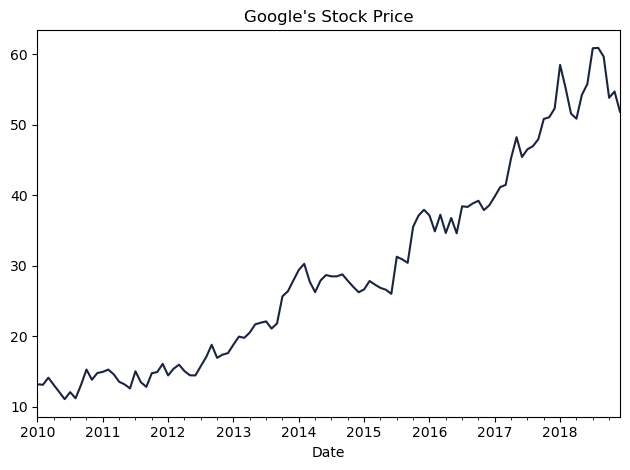

In [8]:
goog.plot(title="Google's Stock Price")

plt.tight_layout()
plt.show()

6. Fit 3 Simple Exponential Smoothing models and create forecasts:

In [9]:
ses_1 = SimpleExpSmoothing(goog_train).fit(smoothing_level=0.2)
ses_forecast_1 = ses_1.forecast(test_length)

ses_2 = SimpleExpSmoothing(goog_train).fit(smoothing_level=0.5)
ses_forecast_2 = ses_2.forecast(test_length)

ses_3 = SimpleExpSmoothing(goog_train).fit()
alpha = ses_3.model.params['smoothing_level']
ses_forecast_3 = ses_3.forecast(test_length)

C:\Users\nking\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\nking\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


7. Plot the original prices together with the models' results:

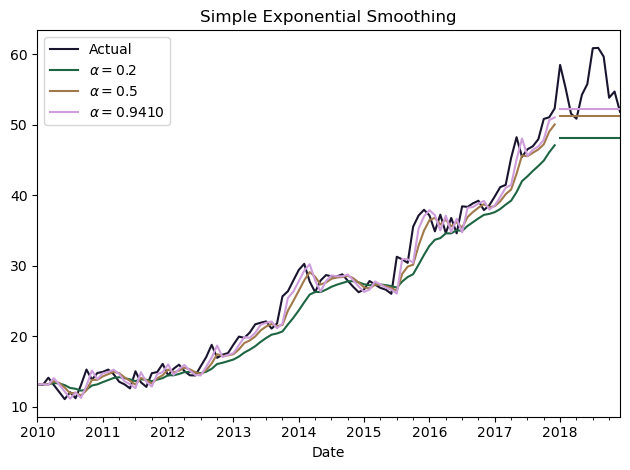

In [10]:
goog.plot(color=COLORS[0], 
         title='Simple Exponential Smoothing',
         label='Actual',
         legend=True)

ses_forecast_1.plot(color=COLORS[1], legend=True, 
                   label=r'$\alpha=0.2$')
ses_1.fittedvalues.plot(color=COLORS[1])

ses_forecast_2.plot(color=COLORS[2], legend=True, 
                   label=r'$\alpha=0.5$')
ses_2.fittedvalues.plot(color=COLORS[2])

ses_forecast_3.plot(color=COLORS[3], legend=True, 
                   label=r'$\alpha={0:.4f}$'.format(alpha))
ses_3.fittedvalues.plot(color=COLORS[3])

plt.tight_layout()
plt.show()

8. Fit 3 variants of the Holt's Smoothing models and create forecasts:

In [11]:
# Holt's model with linear trend
hs_1 = Holt(goog_train).fit()
hs_forecast_1 = hs_1.forecast(test_length)

# Holt's model with exponential trend
hs_2 = Holt(goog_train, exponential=True).fit()
# equivalent to ExponentialSmoothing(goog_train, trend='mul').fit()
hs_forecast_2 = hs_2.forecast(test_length)

# Holt's model with exponential trend and damping
hs_3 = Holt(goog_train, exponential=False, 
           damped=True).fit(damping_slope=0.99)
hs_forecast_3 = hs_3.forecast(test_length)

C:\Users\nking\AppData\Local\Temp\ipykernel_5884\3303886534.py:11: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hs_3 = Holt(goog_train, exponential=False,
C:\Users\nking\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)


9. Plot the original prices together with the models' results:

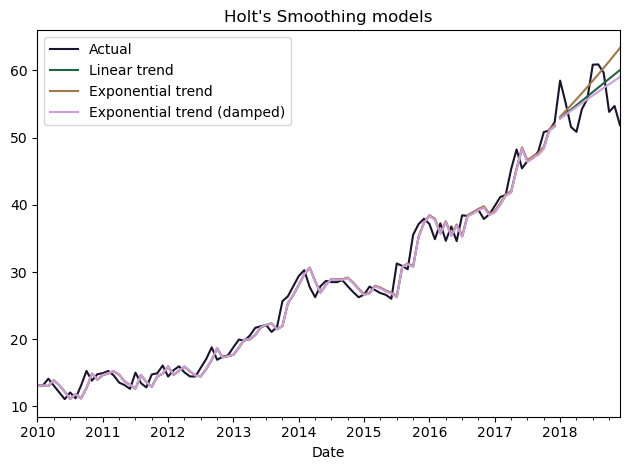

In [12]:
goog.plot(color=COLORS[0],
         title="Holt's Smoothing models",
         label='Actual',
         legend=True)

hs_1.fittedvalues.plot(color=COLORS[1])
hs_forecast_1.plot(color=COLORS[1], legend=True, 
                  label='Linear trend')

hs_2.fittedvalues.plot(color=COLORS[2])
hs_forecast_2.plot(color=COLORS[2], legend=True, 
                  label='Exponential trend')

hs_3.fittedvalues.plot(color=COLORS[3])
hs_forecast_3.plot(color=COLORS[3], legend=True, 
                  label='Exponential trend (damped)')

plt.tight_layout()
plt.show()